## Data Pull


In [51]:
import os
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

symbols = [
    "AMD", "NVDA", "AVGO", "MU", "TSM", "QCOM", "NET",
    "SNOW", "AMZN", "MSFT", "GOOGL", "DDOG", "ESTC", "DOCN", "PLTR", "MDB", 
    "OKTA", "CRWD", "ZS", "PANW", "S", "FTNT", "CYBR", "U",
    "TTD", "ROKU", "PINS", "SNAP", "PUBM", "CFLT", "GTLB", "FROG", "PD",
    "ORCL"
]

def get_price_data(tickers: list):
    
    # Download data
    try:
        data = yf.download(tickers, period="2y")
        data.to_csv("data.csv")
        print(data.isnull().sum())
        close_missing = data["Close"].isnull().sum()
        print("Missing values per ticker in Close:")
        print(close_missing)
        
     
        if close_missing.sum() > 0:
            print(f"Total missing Close values: {close_missing.sum()}")
        else:
            print("No missing values in Close data")
            
        # Calculate and save close percent returns
        close_returns = data["Close"].pct_change()
        close_returns.to_csv("close_returns.csv")
        
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None
    
get_price_data(symbols)


C:\Users\Michael Gray\AppData\Local\Temp\ipykernel_13240\2681448440.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="2y")
[*********************100%***********************]  34 of 34 completed


Price   Ticker
Close   AMD       0
        AMZN      0
        AVGO      0
        CFLT      0
        CRWD      0
                 ..
Volume  SNOW      0
        TSM       0
        TTD       0
        U         0
        ZS        0
Length: 170, dtype: int64
Missing values per ticker in Close:
Ticker
AMD      0
AMZN     0
AVGO     0
CFLT     0
CRWD     0
CYBR     0
DDOG     0
DOCN     0
ESTC     0
FROG     0
FTNT     0
GOOGL    0
GTLB     0
MDB      0
MSFT     0
MU       0
NET      0
NVDA     0
OKTA     0
ORCL     0
PANW     0
PD       0
PINS     0
PLTR     0
PUBM     0
QCOM     0
ROKU     0
S        0
SNAP     0
SNOW     0
TSM      0
TTD      0
U        0
ZS       0
dtype: int64
No missing values in Close data


## PCA Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def simple_pca_analysis(returns_df, n_components=10):
    if 'Date' in returns_df.columns:
        returns_df = returns_df.set_index('Date')

    clean_returns = returns_df.select_dtypes(include=[np.number]).dropna()
    
    scaler = StandardScaler()
    scaled_returns = scaler.fit_transform(clean_returns)
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_returns)
    
    print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Cumulative variance explained: {pca.explained_variance_ratio_.cumsum()}")
    
    pca_df = pd.DataFrame(pca_result, 
                         index=clean_returns.index,
                         columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df.to_csv("pca_results.csv")
    
    return pca, pca_df

close_returns = pd.read_csv("close_returns.csv", index_col=0) 
simple_pca_analysis(close_returns)



Explained variance ratio: [0.38341151 0.06672902 0.04549765 0.03635337 0.03032539 0.02961353
 0.02725117 0.0256699  0.02375979 0.02102794]
Cumulative variance explained: [0.38341151 0.45014053 0.49563819 0.53199155 0.56231695 0.59193047
 0.61918164 0.64485154 0.66861133 0.68963927]


(PCA(n_components=10),
                  PC1       PC2       PC3       PC4       PC5       PC6  \
 Date                                                                     
 2023-09-26 -3.795849 -0.378306 -0.446783 -0.311435  0.802758  0.838484   
 2023-09-27  2.031677 -0.616510 -0.028849  0.018316  0.033812  0.290187   
 2023-09-28  2.433707 -0.190813  0.354413 -0.267316 -0.399318 -0.369554   
 2023-09-29  1.823479 -0.538687  0.562251  0.347996  0.053065  0.110663   
 2023-10-02  0.853654  0.674619 -0.839506 -0.611167 -1.427715  0.111533   
 ...              ...       ...       ...       ...       ...       ...   
 2025-09-18  3.641447 -0.528758 -1.392529 -0.934801  0.985058  1.436497   
 2025-09-19  0.868273 -0.979836 -1.044080 -0.936353 -1.251633 -1.433669   
 2025-09-22  0.308464  1.125894  0.150750  1.152829  0.410714 -0.212632   
 2025-09-23 -2.528157  1.004195  0.384429  0.291176  0.906419  0.618245   
 2025-09-24 -2.392062  0.435080 -0.049108  0.634890  0.784854 -0.095785   
 


Explained variance ratio: [0.38341151 0.06672902 0.04549765 0.03635337 0.03032539 0.02961353
 0.02725117 0.0256699  0.02375979 0.02102794]
Cumulative variance explained: [0.38341151 0.45014053 0.49563819 0.53199155 0.56231695 0.59193047
 0.61918164 0.64485154 0.66861133 0.68963927]


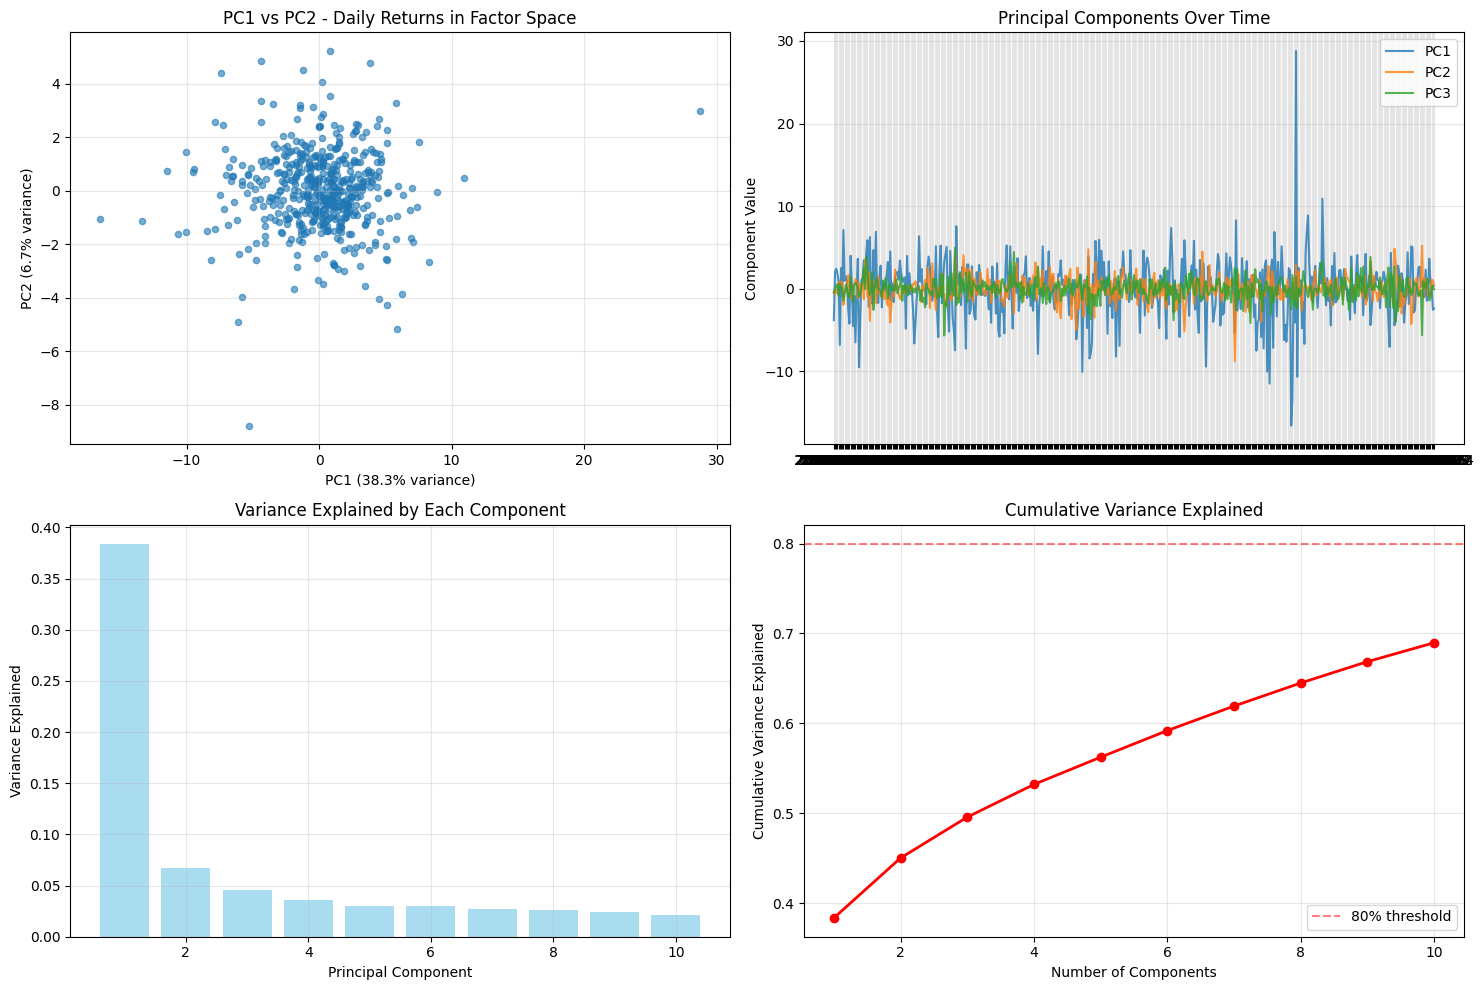

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


def pca_plotting(pca_model, pca_df):
    """Visualize PCA results with multiple plots"""
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. PC1 vs PC2 scatter plot
    ax1.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=20)
    ax1.set_xlabel(f'PC1 ({pca_model.explained_variance_ratio_[0]:.1%} variance)')
    ax1.set_ylabel(f'PC2 ({pca_model.explained_variance_ratio_[1]:.1%} variance)')
    ax1.set_title('PC1 vs PC2 - Daily Returns in Factor Space')
    ax1.grid(True, alpha=0.3)
    
    # 2. Time series of first 3 components
    ax2.plot(pca_df.index, pca_df['PC1'], label='PC1', alpha=0.8)
    ax2.plot(pca_df.index, pca_df['PC2'], label='PC2', alpha=0.8)
    ax2.plot(pca_df.index, pca_df['PC3'], label='PC3', alpha=0.8)
    ax2.set_title('Principal Components Over Time')
    ax2.set_ylabel('Component Value')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Individual variance explained
    components = range(1, len(pca_model.explained_variance_ratio_) + 1)
    ax3.bar(components, pca_model.explained_variance_ratio_, alpha=0.7, color='skyblue')
    ax3.set_xlabel('Principal Component')
    ax3.set_ylabel('Variance Explained')
    ax3.set_title('Variance Explained by Each Component')
    ax3.grid(True, alpha=0.3)
    
    # 4. Cumulative variance explained
    ax4.plot(components, pca_model.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
    ax4.set_xlabel('Number of Components')
    ax4.set_ylabel('Cumulative Variance Explained')
    ax4.set_title('Cumulative Variance Explained')
    ax4.grid(True, alpha=0.3)
    ax4.axhline(y=0.8, color='red', linestyle='--', alpha=0.5, label='80% threshold')
    ax4.legend()
    
    plt.tight_layout()
    plt.show()

# Run your PCA analysis
close_returns = pd.read_csv("close_returns.csv", index_col=0)
pca_model, pca_df = simple_pca_analysis(close_returns)
pca_plotting(pca_model, pca_df)